See if wallstreet bets posts affect NASDAQ stock prices
- Read the data : Xide + Fiona  (Tuesday)
- Formatting the data: Xide + Fiona (Wednesday)
- Cool visualizations →Xide (Thursday)
- Written Report in Github: (Friday)


## Read the data 

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [78]:
df=pd.read_csv('../Data/reddit_wsb.csv',usecols=['title',"score","comms_num","body","timestamp"])
df.head(5)

,title,score,comms_num,body,timestamp
0,"It's not about the money, it's about sending a...",55,6,NaN,2021-01-28 21:37:41
1,Math Professor Scott Steiner says the numbers ...,110,23,NaN,2021-01-28 21:32:10
2,Exit the system,0,47,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28 21:30:35
3,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,29,74,NaN,2021-01-28 21:28:57
4,"Not to distract from GME, just thought our AMC...",71,156,NaN,2021-01-28 21:26:56


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53187 entries, 0 to 53186
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      53187 non-null  object
 1   score      53187 non-null  int64 
 2   comms_num  53187 non-null  int64 
 3   body       24738 non-null  object
 4   timestamp  53187 non-null  object
dtypes: int64(2), object(3)
memory usage: 2.0+ MB


In [80]:
duplicates = df.duplicated()
df[duplicates]


,title,score,comms_num,body,timestamp
14482,"LET'S GO FOLKS, LET'S FUCKING GO!",1,1,I was in tears throughout today. You guys supp...,2021-01-29 03:09:15


There is a duplicate value in the dataset

In [81]:
df = df.drop_duplicates()

In [82]:
pd.isna(df).sum()

title            0
score            0
comms_num        0
body         28449
timestamp        0
dtype: int64

28449 missing value in body

In [83]:
df = df.dropna()

## Formatting the data

In [84]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['date'] = df['timestamp'].dt.date

In [85]:
df.head(5)

,title,score,comms_num,body,timestamp,date
2,Exit the system,0,47,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28 21:30:35,2021-01-28
6,SHORT STOCK DOESN'T HAVE AN EXPIRATION DATE,317,53,Hedgefund whales are spreading disinfo saying ...,2021-01-28 21:26:27,2021-01-28
7,THIS IS THE MOMENT,405,178,Life isn't fair. My mother always told me that...,2021-01-28 21:19:31,2021-01-28
10,"We need to keep this movement going, we all ca...",222,70,I believe right now is one of those rare oppo...,2021-01-28 21:18:25,2021-01-28
12,"Once you're done with GME - $AG and $SLV, the ...",0,16,You guys are champs. GME... who would have tho...,2021-01-28 21:17:10,2021-01-28


In [86]:
df.describe()

,score,comms_num
count,24737.000000,24737.000000
mean,543.402231,401.853054
std,3509.302519,3364.177173
min,0.000000,0.000000
25%,1.000000,2.000000
50%,14.000000,14.000000
75%,107.000000,58.000000
max,111559.000000,93268.000000


text processing 
- remove_URL
- remove_html
- remove_emoji
- remove_punct

In [87]:
import re

def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)
df['body']=df['body'].apply(lambda x : remove_URL(str(x)))
df['title']=df['title'].apply(lambda x : remove_URL(str(x)))

def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

df['title']=df['title'].apply(lambda x : remove_html(str(x)))
df['body']=df['body'].apply(lambda x : remove_html(str(x)))

def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

df['title']=df['title'].apply(lambda x : remove_emoji(str(x)))
df['body']=df['body'].apply(lambda x : remove_emoji(str(x)))

import string

def remove_punct(text):
    table=str.maketrans('','',string.punctuation)
    return text.translate(table)

df['title']=df['title'].apply(lambda x : remove_punct(x))
df['body']=df['body'].apply(lambda x : remove_punct(x))

In [98]:
df['title'] = df['title'].str.replace("’","")
df['body'] = df['body'].str.replace("’","")

In [99]:
df['title_count'] = df.title.apply(lambda x: len(str(x).split(' ')))
df['body_count'] = df.body.apply(lambda x: len(str(x).split(' ')))

##  Cool visualizations

Trend chart of the number of articles published every day

In [100]:
df1 = df.groupby(["date"])["title"].count()
df1 


date
2020-09-29       1
2021-01-28     693
2021-01-29    9112
2021-01-30     650
2021-01-31     426
              ... 
2021-08-12      35
2021-08-13      31
2021-08-14      16
2021-08-15      17
2021-08-16       9
Name: title, Length: 177, dtype: int64

Text(0.5, 1.0, 'Trend chart of the number of articles published every day')

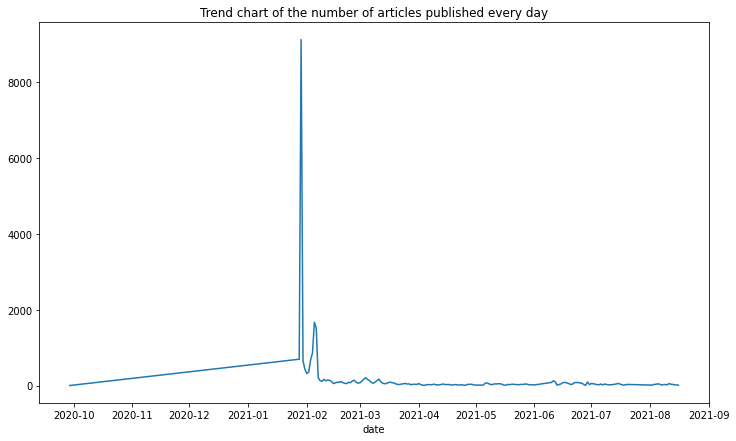

In [101]:
plt.figure(figsize=(12,7))
df1.plot(kind = "line")
plt.title("Trend chart of the number of articles published every day")

Many articles were published in the first few days of February 2021

## Scatter diagram of score	  and comms_num

In [91]:
df

,title,score,comms_num,body,timestamp,date,title_count,body_count
2,Exit the system,0,47,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28 21:30:35,2021-01-28,3,222
6,SHORT STOCK DOESNT HAVE AN EXPIRATION DATE,317,53,Hedgefund whales are spreading disinfo saying ...,2021-01-28 21:26:27,2021-01-28,7,112
7,THIS IS THE MOMENT,405,178,Life isnt fair My mother always told me that w...,2021-01-28 21:19:31,2021-01-28,4,349
10,We need to keep this movement going we all can...,222,70,I believe right now is one of those rare oppo...,2021-01-28 21:18:25,2021-01-28,12,141
12,Once youre done with GME AG and SLV the gentl...,0,16,You guys are champs GME who would have thought...,2021-01-28 21:17:10,2021-01-28,17,248
...,...,...,...,...,...,...,...,...
53181,Ten Year Price Prediction for TSLA,156,204,It’s all contingent on them mastering FSD but ...,2021-08-02 17:11:36,2021-08-02,6,93
53182,What I Learned Investigating SAVA FUD Spreaders,238,87,TLDR Three bitter scientists partnered up with...,2021-08-02 15:03:27,2021-08-02,7,838
53183,Daily Popular Tickers Thread for August 02 202...,228,1070,\nYour daily hype thread Please keep the shitp...,2021-08-02 15:01:03,2021-08-02,14,90
53185,Daily Discussion Thread for August 02 2021,338,11688,Your daily trading discussion thread Please ke...,2021-08-02 13:00:16,2021-08-02,7,124


In [102]:
# Scatter chart
import plotly.express as px
px.scatter_matrix(
  df, 
  dimensions=["score","comms_num","title_count","body_count"]) 

The  above scatter diagram does not reflect the specific relationship

What are the top 10 words that shows frequently in title and body ?

In [103]:
df.index = range(len(df))

In [104]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))

corpus_title = []
corpus_body = []

for i in range(len(df)):
    title = word_tokenize(df.iloc[i]['title'])
    for word in title:
        word = word.lower()
        if (word not in stop_words) and (word not in string.punctuation):
            corpus_title.append(word)
    body = word_tokenize(df.iloc[i]['body'])
    for corpus in body:
        corpus = corpus.lower()
        if (corpus not in stop_words) and (corpus not in string.punctuation):
            corpus_body.append(corpus)

In [105]:
print(len(corpus_title))
print(len(corpus_body))

142986
2954625


In [106]:
from collections import Counter

title_counter=Counter(corpus_title)
title_counter.most_common()[:10]

[('gme', 4242),
 ('buy', 1859),
 ('robinhood', 1735),
 ('amc', 1692),
 ('hold', 1156),
 ('dd', 992),
 ('stock', 920),
 ('short', 898),
 ('dont', 795),
 ('market', 686)]

In [110]:
title_counter10 = pd.DataFrame(title_counter.most_common()[:10])
title_counter10.columns = ["word","frequency"]

In [115]:
fig = px.bar(title_counter10, x='word', y='frequency',
             color='frequency', 
             height=400, 
             title="The top 10 words that appear most frequently in the title"
            )
fig.show()

In [107]:
body_counter=Counter(corpus_body)
body_counter.most_common()[:10]

[('stock', 17925),
 ('market', 15937),
 ('shares', 15378),
 ('price', 14940),
 ('gme', 14893),
 ('like', 14515),
 ('short', 12614),
 ('im', 12231),
 ('x200b', 11635),
 ('buy', 11205)]

In [113]:
body_counter10 = pd.DataFrame(body_counter.most_common()[:10])
body_counter10.columns = ["word","frequency"]

In [116]:
fig = px.bar(body_counter10, x='word', y='frequency',
             color='frequency', 
             height=400, 
            title="The top 10 words that appear most frequently in the body"
            )
fig.show()

## Regression

Establish a regression model to predict the score

In [118]:
df.head()

,title,score,comms_num,body,timestamp,date,title_count,body_count
0,Exit the system,0,47,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28 21:30:35,2021-01-28,3,222
1,SHORT STOCK DOESNT HAVE AN EXPIRATION DATE,317,53,Hedgefund whales are spreading disinfo saying ...,2021-01-28 21:26:27,2021-01-28,7,112
2,THIS IS THE MOMENT,405,178,Life isnt fair My mother always told me that w...,2021-01-28 21:19:31,2021-01-28,4,349
3,We need to keep this movement going we all can...,222,70,I believe right now is one of those rare oppo...,2021-01-28 21:18:25,2021-01-28,12,141
4,Once youre done with GME AG and SLV the gentl...,0,16,You guys are champs GME who would have thought...,2021-01-28 21:17:10,2021-01-28,17,248


In [123]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [121]:
x = df[["comms_num","title_count","body_count"]]
y = df.score

x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 0)
lr = LinearRegression().fit(x_train,y_train)

y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

print(lr.score(x_test,y_test))

0.09429369069935001


For poor prediction results, add RandomForest Regressor . Look at the results.

In [126]:
forest = RandomForestRegressor(n_estimators = 100,
                              random_state = 1,
                              n_jobs = -1)
forest.fit(x_train,y_train)
forest_train_pred = forest.predict(x_train)
forest_test_pred = forest.predict(x_test)

print('MSE train data: %.3f, MSE test data: %.3f' % (mean_squared_error(y_train,forest_train_pred),mean_squared_error(y_test,forest_test_pred)))
print('R2 train data: %.3f, R2 test data: %.3f' % (
r2_score(y_train,forest_train_pred),
r2_score(y_test,forest_test_pred)))

MSE train data: 591634.728, MSE test data: 4999574.927
R2 train data: 0.948, R2 test data: 0.669


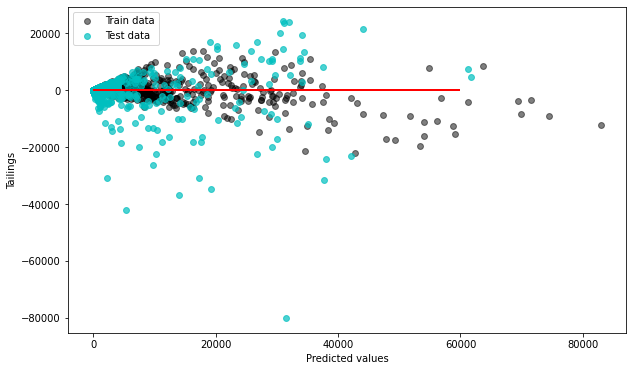

In [127]:
plt.figure(figsize=(10,6))

plt.scatter(forest_train_pred,forest_train_pred - y_train,
          c = 'black', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
plt.scatter(forest_test_pred,forest_test_pred - y_test,
          c = 'c', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Tailings')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')
plt.show()

In [133]:
importances = forest.feature_importances_
feature_names = forest.feature_names_in_
df3 = pd.DataFrame({"importances":importances,"feature":feature_names })

fig = px.bar(df3, x='feature', y='importances',
             color='importances', 
            title="Feature Importance in RandomForestRegressor "
            )
fig.show()



Good result. I hope to get a good result. 

